In [2]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt

This a function that defines EM algorithm. It has several input (parameters): 
1. Iter, which is the number of iterations to be run by the EM algorithm.
2. K, which is the number of clusters or groups we want to find in the data.
3. pdf, which is the function to calculate the probability of data density in a particular cluster, given cluster and data parameters.
4. train, which is the function to update cluster parameters based on data and responsibility weight.
5. Xmat, which is the input data, in the form of a matrix with n data points and d features or dimensions of each data.
6. W_Init, which is the initial weight of each cluster, representing the proportion of the cluster in the mixture.
7. P_Init, which is the initial parameters of each cluster.

And the exp_max function will give output:
1. W, which is the final cluster weights (array 1xK), weight or proportion of each cluster after the EM process is complete.
2. P, which is the final cluster parameter (array dxK), final parameters of each cluster after the iteration is complete.
3. p, which is the responsibility matrix (array Kxn), indicates the probability of each cluster for each data point.

With iterations of Iter, repetitions of E-steps and M-steps are carried out, where in the E-step the probability of each point is calculated based on the parameter values ​​P and W (in the first iteration using P_Init and W_Init). The result is used by the M-step section to calculate new P and W values, which are used for the next iteration.

In [3]:
def exp_max(Iter, K, pdf, train, Xmat, W_Init, P_Init):
    n, D = Xmat.shape
    p = np.zeros((K, n))
    W, P = W_Init, P_Init
    for i in range(0,Iter):
        # E-Step
        for k in range(0,K):
            p[k,:] = W[0,k]*pdf(P[:,k],Xmat)

        # M-Step
        p = (p/sum(p,0))
        W = np.mean(p,1).reshape(1,3)
        for k in range(0,K):
            P[:,k] = train(p[k,:],Xmat)
    return W, P, p

This function calculates new parameters for the cluster (updated cluster mean based on weight p).

In [4]:
def normal_train(p, Xmat):
    m = (Xmat.T @ p.T)/sum(p)
    return m

This function calculates the probability density value of each data pointer in a cluster with parameter m (mean) and covariance matrix c.

In [5]:
def normal_pdf(m, Xmat):
    var = 1
    C = np.zeros((2,2))
    C[0,0] = var
    C[1,1] = var
    mvn = multivariate_normal(m.T, C )
    return mvn.pdf(Xmat)

### Question number 2
Testing the code with example dataset clusterdata.csv. 

In [6]:
Xmat = np.genfromtxt('clusterdata.csv', delimiter=',')
W = np.array([[1/3,1/3,1/3]])
M  = np.array([[-2.0,-4,0],[-3,1,-1]])
W_final, P, p = exp_max(100, 3, normal_pdf, normal_train, Xmat, W, M)

In [7]:
print("W: ", W)
print("M: ", M)
print("W_final: ", W_final)
print("P: ", P)
print("p: ", p)

W:  [[0.33333333 0.33333333 0.33333333]]
M:  [[-1.81723463 -3.90018538  0.53430012]
 [-2.94803675 -0.02989837 -1.36506482]]
W_final:  [[0.26703009 0.35791118 0.37505873]]
P:  [[-1.81723463 -3.90018538  0.53430012]
 [-2.94803675 -0.02989837 -1.36506482]]
p:  [[3.33580121e-03 5.53919118e-04 1.83864034e-03 2.60509876e-04
  1.66517560e-03 2.65312447e-04 2.94128187e-02 1.48551357e-04
  2.25352934e-03 7.47768438e-04 9.75565825e-05 5.15868312e-04
  3.60239767e-03 2.99349983e-03 2.64856781e-04 9.32850730e-04
  9.12256894e-04 6.19373494e-03 3.78229163e-05 9.47152462e-04
  6.33476408e-03 1.70246492e-03 1.82031562e-03 1.01379658e-04
  3.42489246e-04 4.35683435e-05 6.94769852e-04 2.52945679e-03
  1.43418836e-04 8.82585181e-04 4.03370919e-04 2.83516841e-04
  7.82573436e-03 2.68438398e-03 6.22212016e-04 1.90929623e-04
  3.00299379e-05 5.10754583e-04 4.73496672e-03 4.34599280e-04
  1.10884274e-04 1.65699800e-03 5.72850176e-05 6.76208616e-03
  1.74592675e-03 4.71595466e-04 1.29149511e-04 2.05898574e-0

First we plot the data points to see the distribution of the points in the 2D plane.

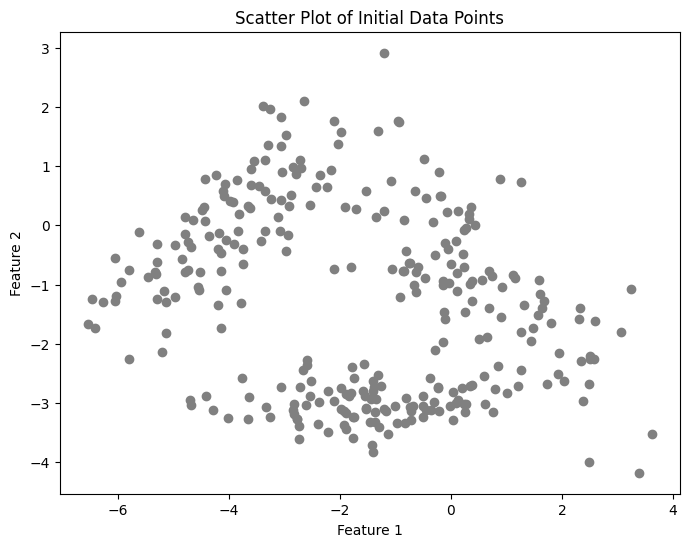

In [8]:
plt.figure(figsize=(8,6))
plt.scatter(Xmat[:,0], Xmat[:,1], c='gray', marker='o')
plt.title('Scatter Plot of Initial Data Points')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


Then we make the plot again based on the final result after running the EM algorithm. We see below that the data points divided into three adequate clusters. The plot also shows the placement of the mean for each cluster.

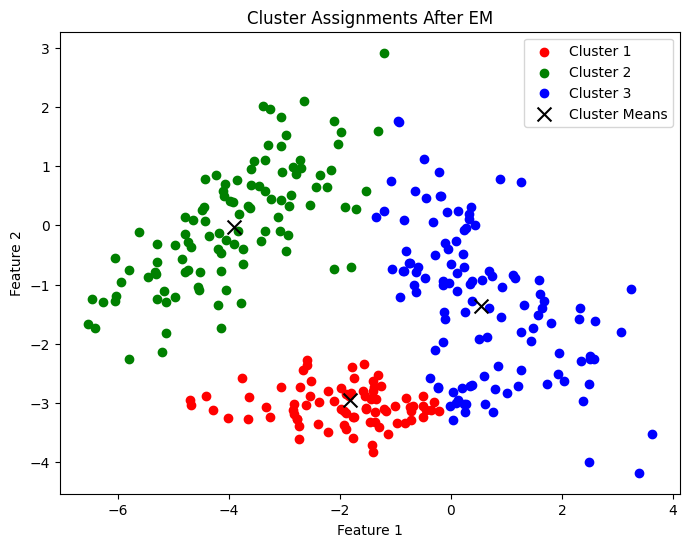

In [9]:

cluster_assignment = np.argmax(p, axis=0)

plt.figure(figsize=(8,6))
colors = ['r', 'g', 'b']
for k in range(3):
    cluster_points = Xmat[cluster_assignment == k]
    plt.scatter(cluster_points[:,0], cluster_points[:,1], c=colors[k], label=f'Cluster {k+1}')
    
plt.scatter(P[0,:], P[1,:], c='k', marker='x', s=100, label='Cluster Means')
plt.title('Cluster Assignments After EM')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


### Question Number 3
In this section, I divided the data points into test and train datasets, with the ratio of data points to train being 70% of the data. I then shuffled the data points and divided them into train_idx (equal to the train_idx ratio), with the remainder going into test_idx.

After that, I reset some of the initial inputs as in the previous example (K, W, and M values). Then, I ran the EM algorithm to obtain the W_final, P_final, and p_train values from the X_train dataset.

After each value was obtained, we tested it on the X_test dataset by running only the Estimation section to determine which cluster each data point in the dataset belonged to.

The results, as shown in the plot, show that the algorithm successfully placed each data point in the correct cluster (adequately clustered), with the exception of a few points that bordered other clusters.


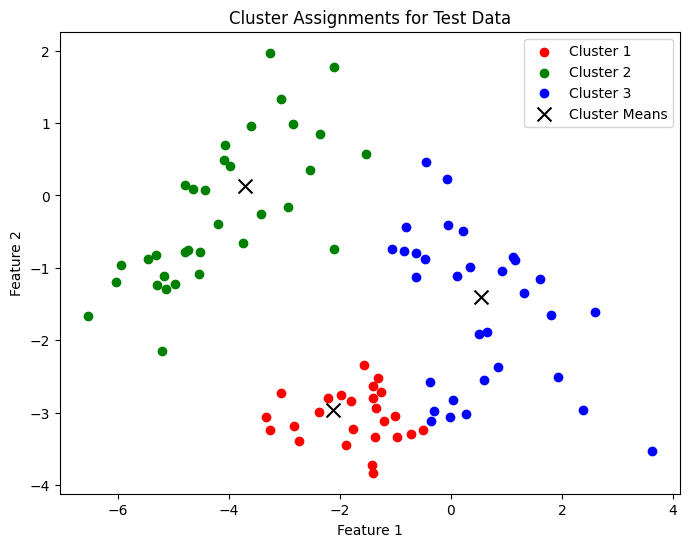

In [10]:
train_ratio = 0.7

np.random.seed(42)
indices = np.arange(Xmat.shape[0])
np.random.shuffle(indices)

train_size = int(train_ratio * len(indices))
train_idx = indices[:train_size]
test_idx = indices[train_size:]

X_train = Xmat[train_idx]
X_test = Xmat[test_idx]

K = 3
W = np.array([[1/3,1/3,1/3]])
M  = np.array([[-2.0,-4,0],[-3,1,-1]])

W_final, P_final, p_train = exp_max(100, K, normal_pdf, normal_train, X_train, W, M)

p_test = np.zeros((K, X_test.shape[0]))
for k in range(K):
    p_test[k,:] = W_final[0,k] * normal_pdf(P_final[:,k], X_test)

p_test = p_test / np.sum(p_test, axis=0)

test_cluster_assignment = np.argmax(p_test, axis=0)

plt.figure(figsize=(8,6))

colors = ['r', 'g', 'b']
for k in range(K):
    cluster_points = X_test[test_cluster_assignment == k]
    plt.scatter(cluster_points[:,0], cluster_points[:,1], c=colors[k], label=f'Cluster {k+1}')

plt.scatter(P_final[0,:], P_final[1,:], c='k', marker='x', s=100, label='Cluster Means')

plt.title('Cluster Assignments for Test Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


### Question Number 4
Our very simple set-up assumes symmetric Gaussians with a fixed variance (1 in this case).
1. If we look at the distribution of the dataset, we can directly see that the distribution is gathered into 3 somewhat rounded clusters, so the assumption of symmetrical Gaussian can still be used quite well.

2. Below, I've tried changing the variance value to smaller and larger ones. When the value is still considered reasonable, such as var=0.2 or var=2, it appears that by changing the variance value to a smaller one, the dataset clustering will be more accurate in placing each dataset point. However, the larger the value, the more unclear the boundaries between each cluster, and many data clusters overlap (but this still seems reasonable because the EM algorithm, which performs many iterations, will form adequate clusters). This will be more obvious when setting the variance to an extremely small amount, where when I tried var=0.01, all data points were included in cluster 1, while a variance that is too large, such as var=5, will create stronger cluster skewing due to overlap, where the distribution is far inadequate (as seen in the example I did, the final mean is all gathered in the middle).

In [13]:
def smaller_pdf(m, Xmat):
    var = 0.09
    C = np.zeros((2,2))
    C[0,0] = var
    C[1,1] = var
    mvn = multivariate_normal(m.T, C )
    return mvn.pdf(Xmat)

def higher_pdf(m, Xmat):
    var = 5
    C = np.zeros((2,2))
    C[0,0] = var
    C[1,1] = var
    mvn = multivariate_normal(m.T, C )
    return mvn.pdf(Xmat)

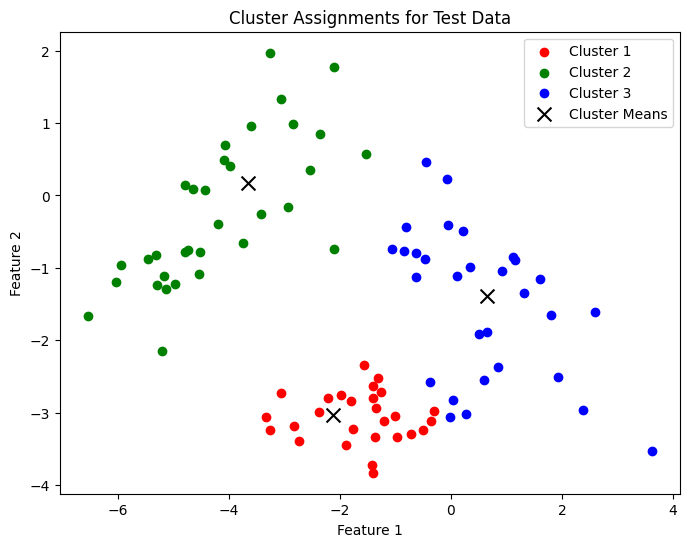

In [14]:
train_ratio = 0.7

np.random.seed(42)  
indices = np.arange(Xmat.shape[0])
np.random.shuffle(indices)

train_size = int(train_ratio * len(indices))
train_idx = indices[:train_size]
test_idx = indices[train_size:]

X_train = Xmat[train_idx]
X_test = Xmat[test_idx]

K = 3
W = np.array([[1/3,1/3,1/3]])
M  = np.array([[-2.0,-4,0],[-3,1,-1]])

W_final, P_final, p_train = exp_max(100, K, smaller_pdf, normal_train, X_train, W, M)

p_test = np.zeros((K, X_test.shape[0]))
for k in range(K):
    p_test[k,:] = W_final[0,k] * smaller_pdf(P_final[:,k], X_test)

p_test = p_test / np.sum(p_test, axis=0)

test_cluster_assignment = np.argmax(p_test, axis=0)

plt.figure(figsize=(8,6))

colors = ['r', 'g', 'b']
for k in range(K):
    cluster_points = X_test[test_cluster_assignment == k]
    plt.scatter(cluster_points[:,0], cluster_points[:,1], c=colors[k], label=f'Cluster {k+1}')

plt.scatter(P_final[0,:], P_final[1,:], c='k', marker='x', s=100, label='Cluster Means')

plt.title('Cluster Assignments for Test Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


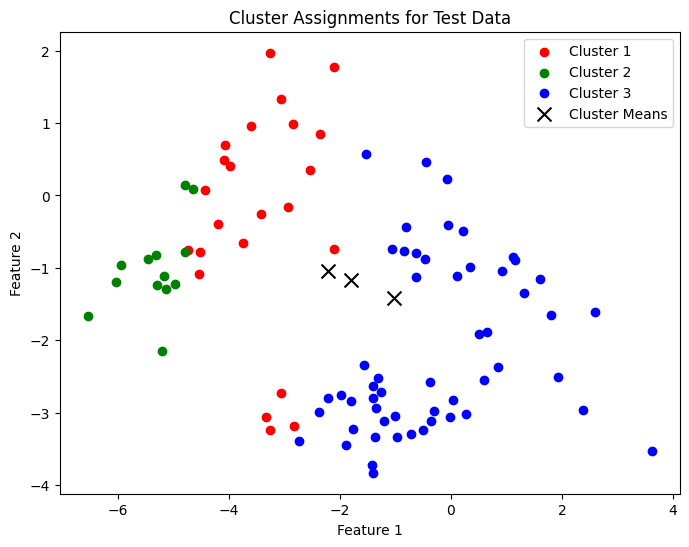

In [15]:
train_ratio = 0.7

np.random.seed(42)  
indices = np.arange(Xmat.shape[0])
np.random.shuffle(indices)

train_size = int(train_ratio * len(indices))
train_idx = indices[:train_size]
test_idx = indices[train_size:]

X_train = Xmat[train_idx]
X_test = Xmat[test_idx]

K = 3
W = np.array([[1/3,1/3,1/3]])
M  = np.array([[-2.0,-4,0],[-3,1,-1]])

W_final, P_final, p_train = exp_max(100, K, higher_pdf, normal_train, X_train, W, M)

p_test = np.zeros((K, X_test.shape[0]))
for k in range(K):
    p_test[k,:] = W_final[0,k] * higher_pdf(P_final[:,k], X_test)

p_test = p_test / np.sum(p_test, axis=0)

test_cluster_assignment = np.argmax(p_test, axis=0)

plt.figure(figsize=(8,6))

colors = ['r', 'g', 'b']
for k in range(K):
    cluster_points = X_test[test_cluster_assignment == k]
    plt.scatter(cluster_points[:,0], cluster_points[:,1], c=colors[k], label=f'Cluster {k+1}')

plt.scatter(P_final[0,:], P_final[1,:], c='k', marker='x', s=100, label='Cluster Means')

plt.title('Cluster Assignments for Test Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


3. Experiment with changing the weight values.
When changing the weight values
- Clusters with higher weights will "attract" more points.
- This can slow convergence, as the model requires more iterations to adjust to the actual proportions.
- Through my experiments, for many iterations, W_final will continue to update the weights to be more normal, so the algorithm will generally still successfully predict the cluster location of each data point in X_test. Conversely, for fewer iterations, clusters with higher weights will attract more points because they haven't yet reached their optimum value.
- Changing the mean value is also interesting. When I made changes, if the mean was too far from the actual initial cluster position, the algorithm would take longer to converge (requiring many iterations), or even eventually the M-step would shift the mean in the wrong direction, especially if the iterations were too few.

4. Experimenting with changing iteration values
This was answered from the previous experiment. If the iterations are few, but the weight and mean values are close to the ideal values, then the results will likely remain optimal even with a small number of iterations. Conversely, if the parameters deviate significantly, and the number of iterations is too few, the results will be very inaccurate because the iterations have not yet reached optimal convergence.

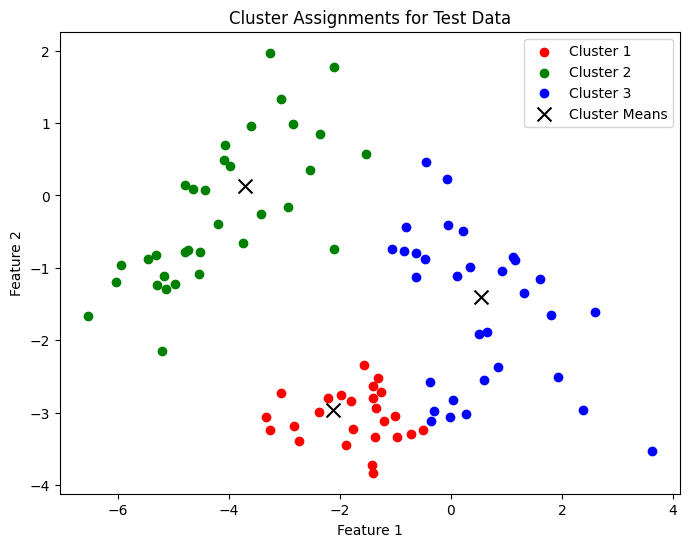

[[0.24165955 0.3552242  0.40311625]]


In [37]:
# Weight changing
train_ratio = 0.7

np.random.seed(42)  
indices = np.arange(Xmat.shape[0])
np.random.shuffle(indices)

train_size = int(train_ratio * len(indices))
train_idx = indices[:train_size]
test_idx = indices[train_size:]

X_train = Xmat[train_idx]
X_test = Xmat[test_idx]

K = 3
W = np.array([[0.95,0.09,0.01]])
M  = np.array([[-2.0,-4,0],[-3,1,-1]])

W_final, P_final, p_train = exp_max(100, K, normal_pdf, normal_train, X_train, W, M)

p_test = np.zeros((K, X_test.shape[0]))
for k in range(K):
    p_test[k,:] = W_final[0,k] * normal_pdf(P_final[:,k], X_test)

p_test = p_test / np.sum(p_test, axis=0)

test_cluster_assignment = np.argmax(p_test, axis=0)

plt.figure(figsize=(8,6))

colors = ['r', 'g', 'b']
for k in range(K):
    cluster_points = X_test[test_cluster_assignment == k]
    plt.scatter(cluster_points[:,0], cluster_points[:,1], c=colors[k], label=f'Cluster {k+1}')

plt.scatter(P_final[0,:], P_final[1,:], c='k', marker='x', s=100, label='Cluster Means')

plt.title('Cluster Assignments for Test Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

print(W_final)


5. Experiment with changing the number of clusters to either fewer or more.
- For fewer clusters, the algorithm appears to attempt to divide the data into two clusters, which is inherently imprecise because some distant points are also included in a particular cluster, making it appear inadequate.
- For too many clusters, the algorithm appears to be overly detailed in dividing the clusters.


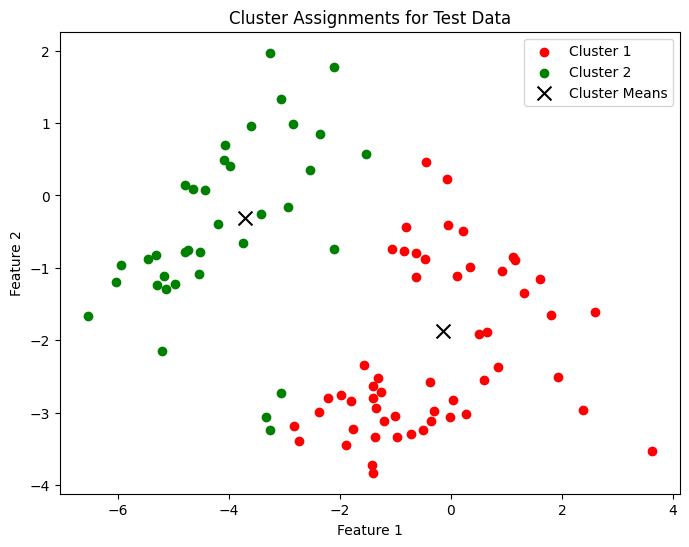

[[0.58727388 0.41272612]]


In [ ]:
# Cluster = 2
def exp_max(Iter, K, pdf, train, Xmat, W_Init, P_Init):
    n, D = Xmat.shape
    p = np.zeros((K, n))
    W, P = W_Init, P_Init
    for i in range(0,Iter):
        # E-Step
        for k in range(0,K):
            p[k,:] = W[0,k]*pdf(P[:,k],Xmat)

        # M-Step
        p = (p/sum(p,0))
        W = np.mean(p,1).reshape(1,2)
        for k in range(0,K):
            P[:,k] = train(p[k,:],Xmat)
    return W, P, p

# Weight changing
train_ratio = 0.7

np.random.seed(42)  
indices = np.arange(Xmat.shape[0])
np.random.shuffle(indices)

train_size = int(train_ratio * len(indices))
train_idx = indices[:train_size]
test_idx = indices[train_size:]

X_train = Xmat[train_idx]
X_test = Xmat[test_idx]

K = 2
W = np.array([[1/2, 1/2]])
M  = np.array([[-2.0,-4],[-3,1]])

W_final, P_final, p_train = exp_max(100, K, normal_pdf, normal_train, X_train, W, M)

p_test = np.zeros((K, X_test.shape[0]))
for k in range(K):
    p_test[k,:] = W_final[0,k] * normal_pdf(P_final[:,k], X_test)

p_test = p_test / np.sum(p_test, axis=0)

test_cluster_assignment = np.argmax(p_test, axis=0)

plt.figure(figsize=(8,6))

colors = ['r', 'g', 'b']
for k in range(K):
    cluster_points = X_test[test_cluster_assignment == k]
    plt.scatter(cluster_points[:,0], cluster_points[:,1], c=colors[k], label=f'Cluster {k+1}')

plt.scatter(P_final[0,:], P_final[1,:], c='k', marker='x', s=100, label='Cluster Means')

plt.title('Cluster Assignments for Test Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

print(W_final)


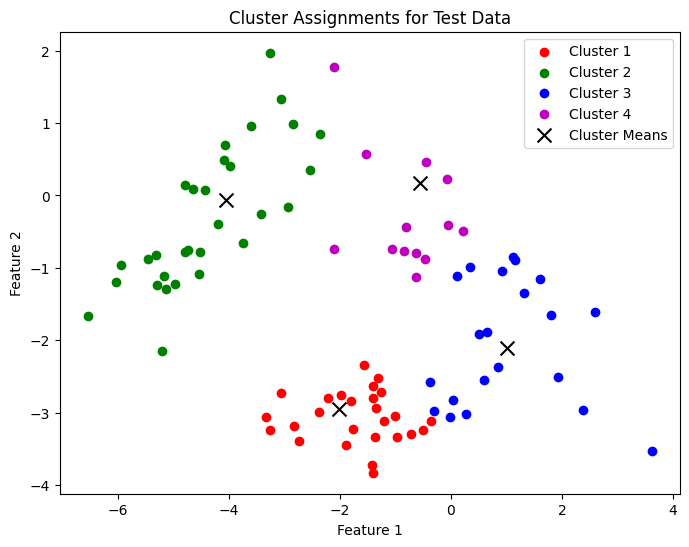

[[0.24594606 0.30841989 0.24496448 0.20066957]]


In [43]:
# Cluster = 4
def exp_max(Iter, K, pdf, train, Xmat, W_Init, P_Init):
    n, D = Xmat.shape
    p = np.zeros((K, n))
    W, P = W_Init, P_Init
    for i in range(0,Iter):
        # E-Step
        for k in range(0,K):
            p[k,:] = W[0,k]*pdf(P[:,k],Xmat)

        # M-Step
        p = (p/sum(p,0))
        W = np.mean(p,1).reshape(1,K)
        for k in range(0,K):
            P[:,k] = train(p[k,:],Xmat)
    return W, P, p

# Weight changing
train_ratio = 0.7

np.random.seed(42)  
indices = np.arange(Xmat.shape[0])
np.random.shuffle(indices)

train_size = int(train_ratio * len(indices))
train_idx = indices[:train_size]
test_idx = indices[train_size:]

X_train = Xmat[train_idx]
X_test = Xmat[test_idx]

K = 4
W = np.array([[1/4, 1/4, 1/4, 1/4]])
M  = np.array([[-2.0,-4,0, 2],[-3,1,-1, 3]])

W_final, P_final, p_train = exp_max(100, K, normal_pdf, normal_train, X_train, W, M)

p_test = np.zeros((K, X_test.shape[0]))
for k in range(K):
    p_test[k,:] = W_final[0,k] * normal_pdf(P_final[:,k], X_test)

p_test = p_test / np.sum(p_test, axis=0)

test_cluster_assignment = np.argmax(p_test, axis=0)

plt.figure(figsize=(8,6))

colors = ['r', 'g', 'b', 'm']
for k in range(K):
    cluster_points = X_test[test_cluster_assignment == k]
    plt.scatter(cluster_points[:,0], cluster_points[:,1], c=colors[k], label=f'Cluster {k+1}')

plt.scatter(P_final[0,:], P_final[1,:], c='k', marker='x', s=100, label='Cluster Means')

plt.title('Cluster Assignments for Test Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

print(W_final)


### Question Number 5
Implementation of k-means algorithm
1. It can be seen that by using the k-means algorithm, the centroid formed produces a value that is close to the final mean after 100 iterations in the EM algorithm, which means that k-means also succeeded in dividing the data into three clusters that are quite adequate (but there are still differences, especially at points that border other clusters).

Centroids (c):  [[-1.9285638  -3.92373524  0.56115053]
 [-3.04155556  0.01309036 -1.29804366]]


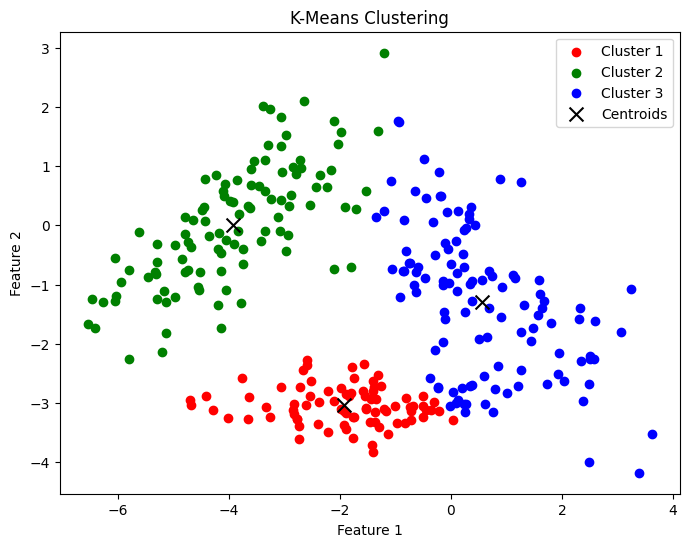

In [46]:
def kmeans(eps, K, Xmat, c_init):
    n, D = Xmat.shape
    c = c_init
    c_old = np.zeros(c.shape)
    dist2 = np.zeros((K,n))
    while np.abs(c - c_old).sum() > eps:
        c_old = c.copy()
        for i in range(0,K): #compute the squared distances
            dist2[i,:] = np.sum((Xmat - c[:,i].T)**2, 1)        
        label = np.argmin(dist2,0) #assign the points to nearest centroid
        minvals = np.amin(dist2,0)
        for i in range(0,K): # recompute the centroids
            entries = np.where(label == i)
            c[:,i] = np.mean(Xmat[entries,:], 1).reshape(1,2)
    return c, label

Xmat = np.genfromtxt('clusterdata.csv', delimiter=',')
c_init  = np.array([[-2.0,-4,0],[-3,1,-1]])
eps = 0.001
K = 3
c, label = kmeans(eps, K, Xmat, c_init) 
print("Centroids (c): ", c)

# show the plot
plt.figure(figsize=(8,6))
colors = ['r', 'g', 'b']
for k in range(K):
    cluster_points = Xmat[label == k]
    plt.scatter(cluster_points[:,0], cluster_points[:,1], c=colors[k], label=f'Cluster {k+1}')

plt.scatter(c[0,:], c[1,:], c='k', marker='x', s=100, label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

2. For data transformation
- If the c_init data point is very far from the actual possible cluster, it can split the cluster into one large cluster, merging the other two clusters. Even if two initial centroids start in the same cloud, one cluster may have no points;
- Decreasing eps is more accurate but takes longer, while increasing eps makes the algorithm run faster but potentially less accurately.

Centroids (c):  [[-0.26961851 -3.88798735]
 [-1.997539   -0.23434916]]


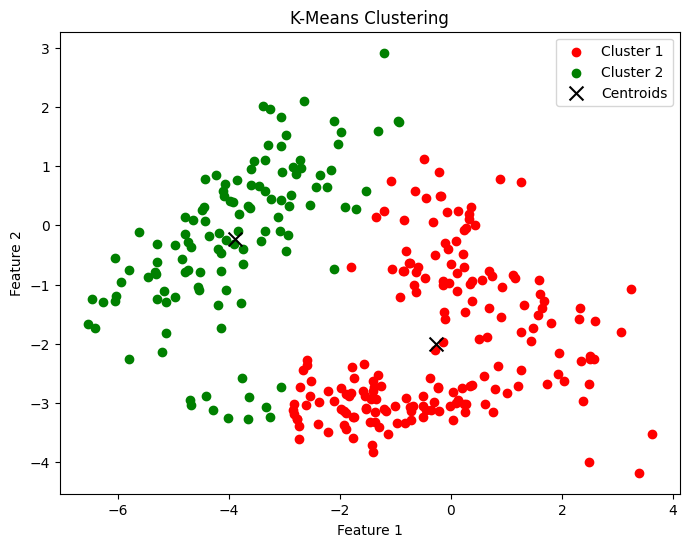

In [47]:
def kmeans(eps, K, Xmat, c_init):
    n, D = Xmat.shape
    c = c_init
    c_old = np.zeros(c.shape)
    dist2 = np.zeros((K,n))
    while np.abs(c - c_old).sum() > eps:
        c_old = c.copy()
        for i in range(0,K): #compute the squared distances
            dist2[i,:] = np.sum((Xmat - c[:,i].T)**2, 1)        
        label = np.argmin(dist2,0) #assign the points to nearest centroid
        minvals = np.amin(dist2,0)
        for i in range(0,K): # recompute the centroids
            entries = np.where(label == i)
            c[:,i] = np.mean(Xmat[entries,:], 1).reshape(1,2)
    return c, label

Xmat = np.genfromtxt('clusterdata.csv', delimiter=',')
c_init  = np.array([[-2.0,-4],[-3,1]])
eps = 0.001
K = 2
c, label = kmeans(eps, K, Xmat, c_init) 
print("Centroids (c): ", c)

# show the plot
plt.figure(figsize=(8,6))
colors = ['r', 'g']
for k in range(K):
    cluster_points = Xmat[label == k]
    plt.scatter(cluster_points[:,0], cluster_points[:,1], c=colors[k], label=f'Cluster {k+1}')

plt.scatter(c[0,:], c[1,:], c='k', marker='x', s=100, label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

3. When the K value is not ideal (in the above exploration, K=2), the data points will be divided into two inadequate clusters because distant points will be included in one of the clusters. Likewise, a large K value will overfit because it divides the cluster into more small regions (centroids pile up close together within the same cluster).